# Taitanic

+ PassengerId – 乗客識別ユニークID
+ Survived – 生存フラグ（0=死亡、1=生存）
+ Pclass – チケットクラス
 > 1 = 上層クラス（お金持ち）
 >
 > 2 = 中級クラス（一般階級）
 >
 > 3 = 下層クラス（労働階級）1 = 上層クラス（お金持ち）
+ Name – 乗客の名前
+ Sex – 性別（male=男性、female＝女性）
+ Age – 年齢
+ SibSp – タイタニックに同乗している兄弟/配偶者の数
+ parch – タイタニックに同乗している親/子供の数
+ ticket – チケット番号
+ fare – 料金
+ cabin – 客室番号
+ Embarked – 出港地（タイタニックへ乗った港）
 > C = Cherbourg
 >
 > Q = Queenstown
 >
 > S = SouthamptonC = Cherbourg

<hr>

## 予測モデル（Part1）

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('csv/train.csv')
test = pd.read_csv('csv/test.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [3]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [ ]:
train.isnull().sum()

In [4]:
embark_label = pd.Series(train['Embarked'])
embark_label.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
train['Embarked'] = train['Embarked'].fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

<ipython-input-6-a02b635cc833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "male"] = 0
<ipython-input-6-a02b635cc833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "female"] = 1
<ipython-input-6-a02b635cc833>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"][train["Embarked"] == "S" ] = 0
<ipython-input-6-a02b635cc833>:4: SettingWithCopyWarning: 
A value

In [ ]:
train.head()

In [7]:
test['Age'] = test['Age'].fillna(train['Age'].median())

In [ ]:
test.isnull().sum()

In [8]:
test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1
test['Embarked'][test['Embarked'] == 'S'] = 0
test['Embarked'][test['Embarked'] == 'C'] = 1
test['Embarked'][test['Embarked'] == 'Q'] = 2

<ipython-input-8-198308f451b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'][test['Sex'] == 'male'] = 0
<ipython-input-8-198308f451b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'][test['Sex'] == 'female'] = 1
<ipython-input-8-198308f451b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Embarked'][test['Embarked'] == 'S'] = 0
<ipython-input-8-198308f451b5>:4: SettingWithCopyWarning: 
A value is try

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

In [9]:
from sklearn import tree

In [10]:
# a.目的変数（予測したい）
target = train['Survived'].values
# b.説明変数
features_one = train[['Pclass', 'Sex', 'Age']].values

In [11]:
# c.決定木モデルを使って、予測。 (2行で機械は学習完了)
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

機械の学習結果

In [12]:
# d.test 説明変数
test_features = test[['Pclass', 'Sex', 'Age']].values
# dを使って、モデル予測
my_prediction = my_tree_one.predict(test_features)

In [13]:
PassengerId = np.array(test['PassengerId']).astype(int)

# CSVファイル書き出し
my_solution = pd.DataFrame(my_prediction, PassengerId, columns=['Survived'])
my_solution.to_csv('csv/my_tree_one.csv', index_label=['PassengerId'])

In [ ]:
PassengerId.shape

In [ ]:
my_solution.shape

Score 71.0 %
<hr>

### EDA

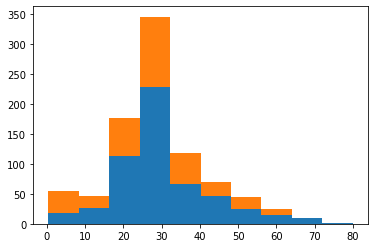

In [36]:
import matplotlib.pyplot as plt

# 空リスト作成
test_list = []

# 
for survived in [0,1]:
    test_list.append(train[train.Survived==survived])

data = [i['Age'].dropna() for i in test_list]

plt.hist(data, stacked=True)
plt.show()